In [1]:
import torch
from data import DEData
from torch.utils.data import DataLoader

In [2]:
# If you haven't trained a model yet, please go to the file 'train_model.ipynb' first!
dE_detas_model = torch.load('./dE_model.pt')
dE_detas_model.eval()

DEModel(
  (linear): Linear(in_features=64, out_features=141, bias=False)
)

In [3]:
dataset = DEData('dE_data') + DEData('dE_data_2')

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True
)

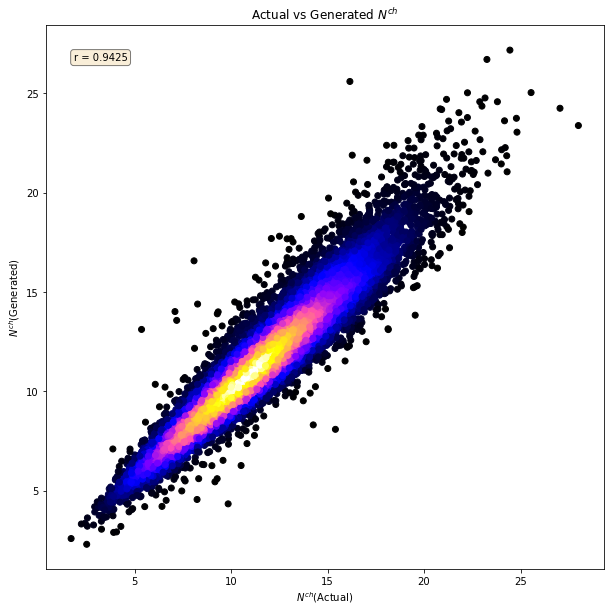

In [4]:
# How many you want to see
limit = 1
bound_1 = -4.9
bound_2 = -4.
finals = []
models = []

import utils
import plot
import numpy as np

# for i, data in enumerate(data_loader):
#     if i >= limit:
#         break
#     dE_detas_initial = data[0].flatten()
#     dNch_detas_final = data[1].flatten()
#     output = dE_detas_model(dE_detas_initial.float())
#
#     _, dNch_detas_final_trim = utils.trim(dataset.final_eta, dNch_detas_final.numpy(), bound_1, bound_2)
#     x_axis, output_trim = utils.trim(dataset.final_eta, output.detach().numpy(), bound_1, bound_2)
#
#     plot.plot_output(output_trim, dNch_detas_final_trim, x_axis)

for i, data in enumerate(data_loader):
    dE_detas_initial = data[0].flatten()
    dNch_detas_final = data[1].flatten()
    output = dE_detas_model(dE_detas_initial.float())

    _, dNch_detas_final_trim = utils.trim(dataset.final_eta, dNch_detas_final.numpy(), bound_1, bound_2)
    x_axis, output_trim = utils.trim(dataset.final_eta, output.detach().numpy(), bound_1, bound_2)

    integrated_final = np.trapz(dNch_detas_final_trim, x_axis)
    integrated_output = np.trapz(output_trim, x_axis)

    finals.append( integrated_final )
    models.append( integrated_output )

plot.plot_cc_graph(finals, models)

In [5]:
dataset = DEData( 'dE_data_2' )

data_loader = DataLoader(
    dataset=dataset
)

In [6]:
# If you haven't trained a model yet, please go to the file 'train_model.ipynb' first!
dE_detas_model = torch.load('./dE_model_ztest.pt')
dE_detas_model.eval()

DEModel(
  (linear): Linear(in_features=64, out_features=141, bias=True)
)

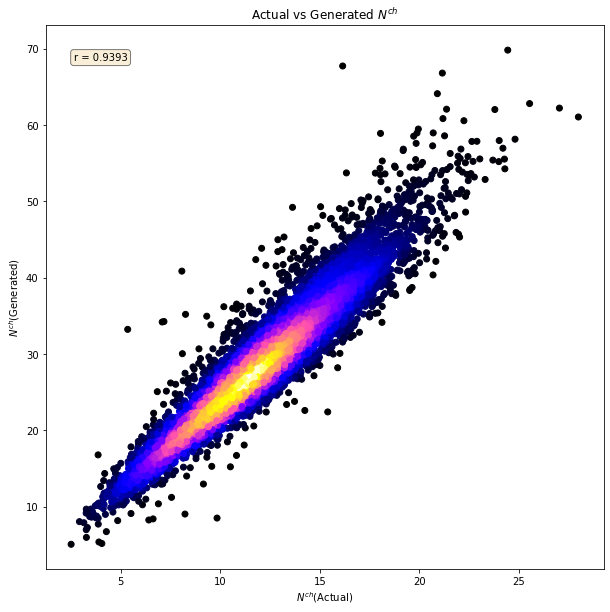

In [7]:
# How many you want to see
limit = 5
bound_1 = -4.9
bound_2 = -4.
finals = []
models = []

import utils
import plot
import numpy as np

# for i, data in enumerate(data_loader):
#     if i >= limit:
#         break
#     dE_detas_initial = data[0].flatten()
#     dNch_detas_final = data[1].flatten()
#     output = dE_detas_model(dE_detas_initial.float())
#
#     _, dNch_detas_final_trim = utils.trim(dataset.final_eta, dNch_detas_final.numpy(), bound_1, bound_2)
#     x_axis, output_trim = utils.trim(dataset.final_eta, output.detach().numpy(), bound_1, bound_2)
#
#     plot.plot_output(output_trim, dNch_detas_final_trim, x_axis)

for i, data in enumerate(data_loader):
    dE_detas_initial = data[0].flatten()
    dNch_detas_final = data[1].flatten()
    output = dE_detas_model(dE_detas_initial.float())

    _, dNch_detas_final_trim = utils.trim(dataset.final_eta, dNch_detas_final.numpy(), bound_1, bound_2)
    x_axis, output_trim = utils.trim(dataset.final_eta, output.detach().numpy(), bound_1, bound_2)

    integrated_final = np.trapz(dNch_detas_final_trim, x_axis)
    integrated_output = np.trapz(output_trim, x_axis)

    finals.append( integrated_final )
    models.append( integrated_output )

plot.plot_cc_graph(finals, models)